### The premise of this notebook is to archetype a script for extracting motion energy features from a movie using Pymoten.

Information:
From [Finn's paper](https://www.sciencedirect.com/science/article/pii/S1053811921002408)  
- MOVIE runs 1–4 were 921, 918, 915, and 901 TRs, respectively.  
---------- frames / fps / total time / width / height  
movie 1  22104 24.0 921.0 1024 720  
movie 2  22032 24.0 918.0 1024 720  
movie 3  21960 24.0 915.0 1024 720  
movie 4  21624 24.0 901.0 1024 720  

The steps can be as follows:  
make conda environment 
1. Movies to png to luminance
2. Create pyramid
3. Push luminance through pyramid
4. Save features
5. Clean features


import stuff

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import subprocess
from skimage import io
from skimage.transform import resize
from skimage import img_as_ubyte
import imageio
import numpy as np
import skvideo 
skvideo.setFFmpegPath("/srv/conda/envs/lowlevel/bin")
import skvideo.io 
from moviepy.editor import VideoFileClip


data-showcase folder/ 000-paths-intro.ipynb

filepaths and parameters

In [4]:
# hdim = 96
# vdim = 96
# downloadpath = 'shared/hcp-7T_Movies/movie/unzip/Post_20140821_version/'
# movies = ['7T_MOVIE1_CC1_v2.mp4', '7T_MOVIE2_HO1_v2.mp4', '7T_MOVIE3_CC2_v2.mp4', '7T_MOVIE4_HO2_v2.mp4']
# savepath = 'workingdirectory'

functions

In [5]:
def run_bash_command(command):
    '''Runs a bash command and prints the output and error.'''
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()
    output = output.decode('utf-8')
    error = error.decode('utf-8')

    # Check the return code
    return_code = process.returncode
    if return_code == 0:
        # Command executed successfully
        print("Bash command executed successfully!")
        if output:
            print("Output:")
            print(output)
    else:
        # Command execution failed
        print(f"Bash command failed with return code: {return_code}")
        if error:
            print("Error:")
            print(error)

    return None

In [11]:
# def movie_to_png(json_filepath):
#     #open feature json file
with open('/home/jovyan/workingdirectory/feature.json') as f:
    data = json.load(f)

## isolate all info for each stimuli
for stimuli, stimuli_data in data.items():
    hdim = stimuli_data['hdim']
    vdim = stimuli_data['vdim']
    downloadpath = stimuli_data['downloadpath']
    movies = stimuli_data['movies']
    savepath = stimuli_data['savepath']
    for movie in movies:
        moviepath = os.path.join(downloadpath, movie)

        # Define the output directory where the .png images will be saved.
        movienoextension = movie[:len(movie)-4]
        output_directory = f'{savepath} + {movienoextension}/'
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        # Open the video file using VideoFileClip
        video = VideoFileClip(moviepath)
        width = video.size[0]
        height = video.size[1]
        total_frames = int(video.fps * video.duration)
        print(total_frames, video.fps, video.duration, width, height)
        
#         # Process each frame in the video
#         for frame in video.iter_frames(fps=video.fps, dtype='uint8'):
#             # Process the frame (you can replace this with your own processing logic)
#             # For example, you can display the frame, save it to a file, or perform analysis
#             print(frame)
#             # Your processing logic here

#         # Close the video file
#         video.reader.close()







# #         # Loop through each frame and save it as a .png image.
# #         for frame_num, frame in enumerate(video_reader):
# #             # Create the filename for the current frame.
# #             filename = f'{output_directory}frame_{frame_num:04d}.png'

# #             # Save the frame as a .png image.
# #             imageio.imwrite(filename, frame)

# #         # Close the VideoReader object.
# #         video_reader.close()

22104 24.0 921.0 1024 720
22032 24.0 918.0 1024 720
21960 24.0 915.0 1024 720
21624 24.0 901.0 1024 720


In [16]:
1024/8, 720/8

(128.0, 90.0)

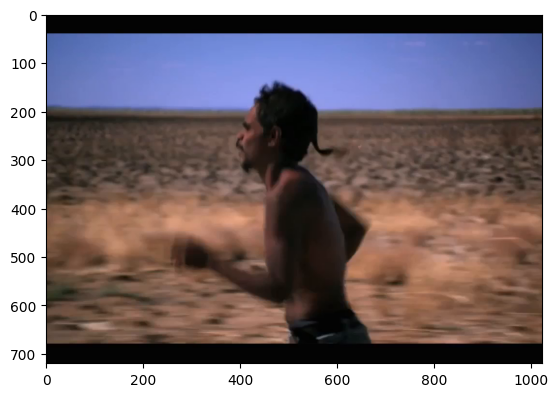

In [10]:
plt.imshow(frame)

In [ ]:
# def movie_to_png(json_filepath):
#     #open feature json file
with open('/home/jovyan/workingdirectory/feature.json') as f:
    data = json.load(f)

## isolate all info for each stimuli
for stimuli, stimuli_data in data.items():
    hdim = stimuli_data['hdim']
    vdim = stimuli_data['vdim']
    downloadpath = stimuli_data['downloadpath']
    movies = stimuli_data['movies']
    savepath = stimuli_data['savepath']
    for movie in movies:
        moviepath = os.path.join(downloadpath, movie)
        
        video_reader = imageio.get_reader(moviepath)

        # Define the output directory where the .png images will be saved.
        movienoextension = movie[:len(movie)-4]
        output_directory = f'{savepath} + {movienoextension}/'
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        # Loop through each frame and save it as a .png image.
        for frame_num, frame in enumerate(video_reader):
            # Create the filename for the current frame.
            filename = f'{output_directory}frame_{frame_num:04d}.png'

            # Save the frame as a .png image.
            imageio.imwrite(filename, frame)

        # Close the VideoReader object.
        video_reader.close()

In [5]:
def png_to_npz(json_filepath):
    '''Converts all pngs in a folder to a single npz file.
    '''
    #open feature json file
    with open(json_filepath) as f:
        data = json.load(f)

    ## isolate all info for each stimuli
    for stimuli, stimuli_data in data.items():
        hdim = stimuli_data['hdim']
        vdim = stimuli_data['vdim']
        downloadpath = stimuli_data['downloadpath']
        movies = stimuli_data['movies']
        savepath = stimuli_data['savepath']
            

In [ ]:
        # for train and test stimuli
        for key, runs in folders.items():
            #for train stimuli
            if key == 'train_folders':
                #for each train stimuli
                for run, indexfile in runs.items():
                    INDEXFILEPATH= png_save_path + indexfile
                    print(INDEXFILEPATH)
                    with open(INDEXFILEPATH) as f:
                        filenames = f.read().splitlines()

                    ### number of images
                    n = len(filenames)
                    
                    ### add full file path to image file names
                    actualpath = png_save_path + run + '/'
                    images = [actualpath + x for x in filenames]

                    #downsize images to
                    # hdim = 96
                    # vdim = 96

                    #place to save!
                    movieimages = np.zeros(shape=(len(images),hdim,vdim,3), dtype=np.uint8)

                    count = 0
                    ### read in images, put in numpy array
                    for idx, image in enumerate(images):
                        img = io.imread(image)
                        img = resize(img, (hdim, vdim))
                        img = img_as_ubyte(img) #convert to 8uint
                        movieimages[idx] = img
                        count += 1
                        if count % 100 == 0:
                            print(count, img.shape)

                    print('3. got 3D array, saving')

                    npz_savepath = save_path + f"{hdim}by{vdim}/"
                    if not os.path.exists(npz_savepath):
                        os.makedirs(npz_savepath)

                    #### save images
                    np.savez(npz_savepath + f"{run}_orig.npz", movie=movieimages) 
                    
            elif key == 'test_folders':
                for run, indexfile in runs.items():
                    for repeat in range(1,4):
                        INDEXFILEPATH= save_path + f'valseq3minby10_0{repeat}.index'

                        #for index, sess in enumerate(folders):
                        print("for " + f"{key}" + ':')
                        with open(INDEXFILEPATH) as f:
                            filenames = f.read().splitlines()
                        print('1. got file names')

                        ### number of images
                        n = len(filenames)
                        
                        actualpath = png_save_path + key + '/'
                        images = [actualpath + x for x in filenames]
                        print('2. got file path names')
                        print(len(images))

                        movieimages = np.zeros(shape=(len(images),hdim,vdim,3), dtype=np.uint8)
                        
                        npz_savepath = save_path + f"{hdim}by{vdim}/"
                        if not os.path.exists(npz_savepath):
                            os.makedirs(npz_savepath)

                        #### save images
                        np.savez(npz_savepath + f"{run}_orig.npz", movie=movieimages) 